# CS 7641 HW1 Code - Supervised Learning

This file will provide analysis for 5 different classification algorithms for two datasets.

Datasets: Phishing Websites, Bank Marketing.

Classification Algorithms: Decision Tree, Neural Network, Boosting, SVM, KNN.

There will be two outputs for each model: a plot of learning curve and a plot of model complexity. Both plots will be generated after hyperparameter tuning is performed.

# 1. Data Load and Preprocessing

First we load the data! Please save the datasets to your local machine and change the current directory to a file where you have the data stored.

In [19]:
import os
import pandas as pd
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

os.chdir(r"C:\...") #change this to your current working directory

### Load the Phishing Website Data

In [20]:
## Download the Phishing Data from OpenML https://www.openml.org/d/4534

df_phish = pd.read_csv('PhishingWebsitesData.csv').astype('category')
print("Data has",len(df_phish),"rows and", len(df_phish.columns),"columns.")
if df_phish.isnull().values.any():
    print("Warning: Missing Data")
#df_phish.head()
#df_phish.describe(include='all')

Data has 11055 rows and 31 columns.


Now that the phishing data is loaded, we need to do some preprocessing. Several of the columns are categorical with the levels {-1,0,1} and the rest are all binary with levels {-1,1}. For the 3-level columns we will use one-hot encoding to create additional features with level {0,1}. Finally, we will edit the binary features so that the new levels are all {0,1}. We will have more features now, but they will all be binary.

In [21]:
col_1hot = ['URL_Length','having_Sub_Domain','SSLfinal_State','URL_of_Anchor','Links_in_tags','SFH','web_traffic','Links_pointing_to_page']
df_1hot = df_phish[col_1hot]
df_1hot = pd.get_dummies(df_1hot)
df_others = df_phish.drop(col_1hot,axis=1)
df_phish = pd.concat([df_1hot,df_others],axis=1)
df_phish = df_phish.replace(-1,0).astype('category')
column_order = list(df_phish)
column_order.insert(0, column_order.pop(column_order.index('Result')))
df_phish = df_phish.loc[:, column_order]  #move the target variable 'Result' to the front
df_phish.describe(include='all')

,Result,URL_Length_-1,URL_Length_0,URL_Length_1,having_Sub_Domain_-1,having_Sub_Domain_0,having_Sub_Domain_1,SSLfinal_State_-1,SSLfinal_State_0,SSLfinal_State_1,...,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Page_Rank,Google_Index,Statistical_report
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,1,1,0,0,0,0,0,0,0,1,...,0,1,1,1,1,1,1,0,1,1
freq,6157,8960,10920,9095,7692,7433,6985,7498,9888,6331,...,9776,9740,10579,8918,10043,5866,7612,8201,9516,9505


We now have a file with no missing data in the format [y, X] where all features are binary {0,1}. The phishing data is ready to go! Now we move on to loading the Bank Marketing data.

### Load the Bank Marketing Data

In [7]:
## Load the Bank Marketing Data from OpenML https://www.openml.org/d/1461

df_bank = pd.read_csv('BankMarketingData.csv')
print("Data has",len(df_bank),"rows and", len(df_bank.columns),"columns.")
if df_bank.isnull().values.any():
    print("Warning: Missing Data")
#df_bank.head()
#df_bank.describe(include='all')

Data has 45307 rows and 21 columns.


This dataset needs some preprocessing love too. We will convert all categorical columns using one hot encoding. Additionally, we will standardize all of the numeric features and we will convert the target variable from {no,yes} to {0,1}. It should be noted that the feature 'pdays' is numeric but contains values that are '999' if the customer was not called before. It may be worth while to create a new feature that defines whether or not {0,1} a customer had been called before. In the current state the '999' values may be outliers. Finally we will standardize all numeric columns.

In [8]:
col_1hot = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_1hot = df_bank[col_1hot]
df_1hot = pd.get_dummies(df_1hot).astype('category')
df_others = df_bank.drop(col_1hot,axis=1)
df_bank = pd.concat([df_others,df_1hot],axis=1)
column_order = list(df_bank)
column_order.insert(0, column_order.pop(column_order.index('y')))
df_bank = df_bank.loc[:, column_order]
df_bank['y'].replace("no",0,inplace=True)
df_bank['y'].replace("yes",1,inplace=True)
df_bank['y'] = df_bank['y'].astype('category')

numericcols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_num = df_bank[numericcols]
df_stand =(df_num-df_num.min())/(df_num.max()-df_num.min())
df_bank_categorical = df_bank.drop(numericcols,axis=1)
df_bank = pd.concat([df_bank_categorical,df_stand],axis=1)
df_bank.describe(include='all')

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45307.0,45307.0,45307.0,45307.0,45307.0,45307.0,45307.0,45307.0,45307.0,45307.0,...,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,40216.0,33873.0,35169.0,43703.0,44137.0,42059.0,43421.0,43727.0,40945.0,44350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.284348,0.052491,0.028452,0.963252,0.024935,0.725451,0.535866,0.430867,0.677238,0.768943
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.128536,0.052636,0.050041,0.187558,0.071338,0.327131,0.225597,0.193519,0.393188,0.273651
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.185185,0.020740,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.370370,0.064864,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000


Now we have successfully loaded and processed both datasets. We are ready to start the ML!

# 2. Helper Functions

### Data Loading and Function Prep

Before we get into the algorithms, let's define some helper functions that will be used across all of the models and both datasets. We will define a function to load the data (not really necessary in a Jupyter notebook, but good if this is exported as a .py for later use). We will also define a function that plots the learning curve (training and cross validation score as a function of training examples) of an estimator (classification model). Finally, we define functions to output final model scores using an untouched test dataset.

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import itertools
import timeit

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12

def import_data():

    X1 = np.array(df_phish.values[:,1:-1],dtype='int64')
    Y1 = np.array(df_phish.values[:,0],dtype='int64')
    X2 = np.array(df_bank.values[:,1:-1],dtype='int64')
    Y2 = np.array(df_bank.values[:,0],dtype='int64')
    return X1, Y1, X2, Y2


def plot_learning_curve(clf, X, y, title="Insert Title"):
    
    n = len(y)
    train_mean = []; train_std = [] #model performance score (f1)
    cv_mean = []; cv_std = [] #model performance score (f1)
    fit_mean = []; fit_std = [] #model fit/training time
    pred_mean = []; pred_std = [] #model test/prediction times
    train_sizes=(np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X[idx,:]
        y_subset = y[idx]
        scores = cross_validate(clf, X_subset, y_subset, cv=10, scoring='f1', n_jobs=-1, return_train_score=True)
        
        train_mean.append(np.mean(scores['train_score'])); train_std.append(np.std(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score'])); cv_std.append(np.std(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time'])); fit_std.append(np.std(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time'])); pred_std.append(np.std(scores['score_time']))
    
    train_mean = np.array(train_mean); train_std = np.array(train_std)
    cv_mean = np.array(cv_mean); cv_std = np.array(cv_std)
    fit_mean = np.array(fit_mean); fit_std = np.array(fit_std)
    pred_mean = np.array(pred_mean); pred_std = np.array(pred_std)
    
    plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title)
    plot_times(train_sizes, fit_mean, fit_std, pred_mean, pred_std, title)
    
    return train_sizes, train_mean, fit_mean, pred_mean
    

def plot_LC(train_sizes, train_mean, train_std, cv_mean, cv_std, title):
    
    plt.figure()
    plt.title("Learning Curve: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model F1 Score")
    plt.fill_between(train_sizes, train_mean - 2*train_std, train_mean + 2*train_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, cv_mean - 2*cv_std, cv_mean + 2*cv_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, cv_mean, 'o-', color="r", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()
    
    
def plot_times(train_sizes, fit_mean, fit_std, pred_mean, pred_std, title):
    
    plt.figure()
    plt.title("Modeling Time: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Training Time (s)")
    plt.fill_between(train_sizes, fit_mean - 2*fit_std, fit_mean + 2*fit_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, pred_mean - 2*pred_std, pred_mean + 2*pred_std, alpha=0.1, color="r")
    plt.plot(train_sizes, fit_mean, 'o-', color="b", label="Training Time (s)")
    plt.plot(train_sizes, pred_std, 'o-', color="r", label="Prediction Time (s)")
    plt.legend(loc="best")
    plt.show()
    
    
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(2), range(2)):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    
def final_classifier_evaluation(clf,X_train, X_test, y_train, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    
    start_time = timeit.default_timer()    
    y_pred = clf.predict(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time
    
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)

    print("Model Evaluation Metrics Using Untouched Test Dataset")
    print("*****************************************************")
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("F1 Score:  "+"{:.2f}".format(f1))
    print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
    print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    print("*****************************************************")
    plt.figure()
    plot_confusion_matrix(cm, classes=["0","1"], title='Confusion Matrix')
    plt.show()

# 3. The Fun Part: Machine Learning!

# Neural Network Classifier

This section will build a forward-feed neural network which computes weights via backpropagation (a multilayer perceptron). The main hyperparameter will be number of hidden nodes in a network defined by a single hidden layer, while others that could be searched over in grid search are activation function, and learning rate.

In [10]:
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    hlist = np.linspace(1,150,30).astype('int')
    for i in hlist:         
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.05, random_state=100)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
      
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    
def NNGridSearchCV(X_train, y_train):
    #parameters to search:
    #number of hidden units
    #learning_rate
    h_units = [5, 10, 20, 30, 40, 50, 75, 100]
    learning_rates = [0.01, 0.05, .1]
    param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}

    net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='logistic',random_state=100),
                       param_grid=param_grid, cv=10)
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes'], net.best_params_['learning_rate_init']

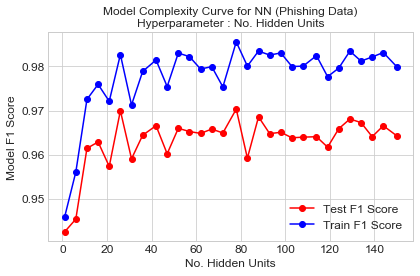

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 50, 'learning_rate_init': 0.01}


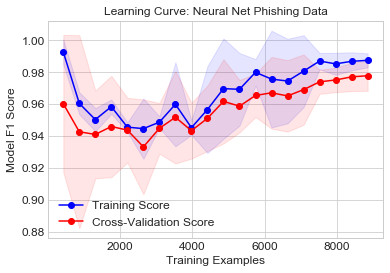

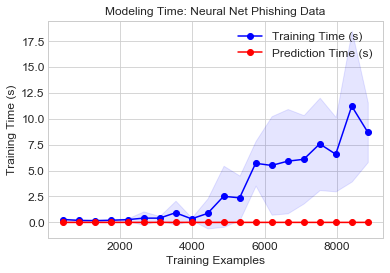

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   3.48248
Model Prediction Time (s): 0.00334

F1 Score:  0.96
Accuracy:  0.96     AUC:       0.96
Precision: 0.97     Recall:    0.96
*****************************************************


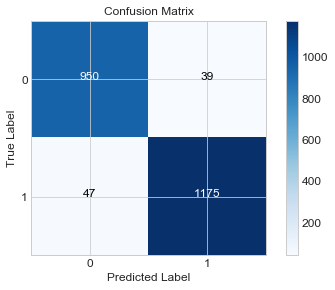

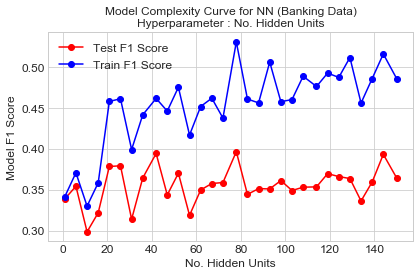

Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 5, 'learning_rate_init': 0.05}


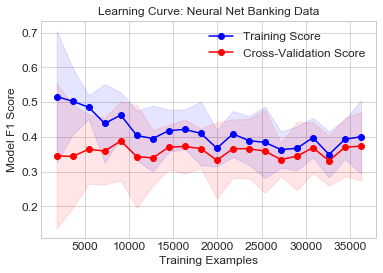

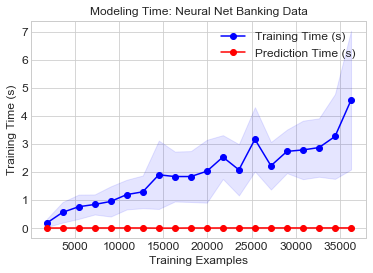

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.81165
Model Prediction Time (s): 0.00521

F1 Score:  0.30
Accuracy:  0.90     AUC:       0.59
Precision: 0.65     Recall:    0.19
*****************************************************


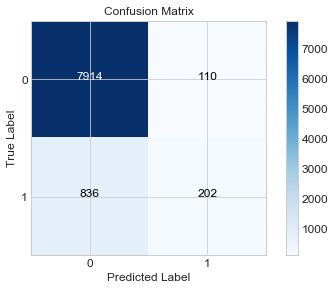

In [10]:
phishX,phishY,bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(phishX),np.array(phishY), test_size=0.20)
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN (Phishing Data)\nHyperparameter : No. Hidden Units")
h_units, learn_rate = NNGridSearchCV(X_train, y_train)
estimator_phish = MLPClassifier(hidden_layer_sizes=(h_units,), solver='adam', activation='logistic', 
                               learning_rate_init=learn_rate, random_state=100)
train_samp_phish, NN_train_score_phish, NN_fit_time_phish, NN_pred_time_phish = plot_learning_curve(estimator_phish, X_train, y_train,title="Neural Net Phishing Data")
final_classifier_evaluation(estimator_phish, X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units")
h_units, learn_rate = NNGridSearchCV(X_train, y_train)
estimator_bank = MLPClassifier(hidden_layer_sizes=(h_units,), solver='adam', activation='logistic', 
                               learning_rate_init=learn_rate, random_state=100)
train_samp_bank, NN_train_score_bank, NN_fit_time_bank, NN_pred_time_bank = plot_learning_curve(estimator_bank, X_train, y_train,title="Neural Net Banking Data")
final_classifier_evaluation(estimator_bank, X_train, X_test, y_train, y_test)

The final section for neural network will plot the loss curve for each dataset over the iterations.

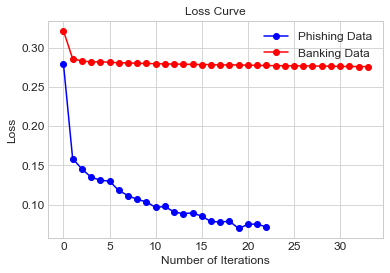

In [17]:
phishX,phishY,bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(phishX),np.array(phishY), test_size=0.20)
estimator_phish = MLPClassifier(hidden_layer_sizes=(50,), solver='adam', activation='logistic', 
                               learning_rate_init=0.05, random_state=100)
estimator_phish.fit(X_train, y_train)
a = estimator_phish.loss_curve_

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)
estimator_bank = MLPClassifier(hidden_layer_sizes=(5,), solver='adam', activation='logistic', 
                               learning_rate_init=0.01, random_state=100)
estimator_bank.fit(X_train, y_train)
b = estimator_bank.loss_curve_

plt.figure()
plt.title("Loss Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.plot(a, 'o-', color="b", label="Phishing Data")
plt.plot(b, 'o-', color="r", label="Banking Data")
plt.legend(loc="best")
plt.show()

This section will create a surface plot for the Phishing data to see where the local and global maxima occur for different numbers of hidden units for a network with 2 hidden layers.

In [11]:
# from mpl_toolkits.mplot3d import Axes3D

# def runNeural(XTrain,YTrain,XTest,YTest,learn_rate,sz1,sz2,testit=True,times=1):
#     for mm in range(1,times+1):
#         #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#         clf = MLPClassifier(learning_rate_init=learn_rate,activation='logistic', hidden_layer_sizes=(sz1, sz2), random_state=100)
#         clf.fit(XTrain, YTrain)
#         if testit:
#             mmm = clf.predict(XTest)
#             return((sum(mmm == YTest) / len(mmm))/times)
#     return(0)

# X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)

# trackertot2 = [[0]*5]*5
# nspot = 10
# trackertot = np.zeros((nspot,nspot))
# xtot = []
# ytot = []
# maxtrack = 0
# x_vals = np.linspace(1,50,nspot).astype('int')
# y_vals = np.linspace(1,50,nspot).astype('int')
# for x in range(1,nspot+1):
#     xi = x_vals[x-1]
#     for y in range(1,nspot+1):
#         yi = y_vals[y-1]
#         tracker = (runNeural(X_train,y_train,X_test,y_test,0.05,xi,yi))
#         trackertot[x-1][y-1]=tracker
#         if(tracker>maxtrack):
#             maxtrack = tracker

# X, Y = np.meshgrid(x_vals, y_vals)
# fig = plt.figure()
# # Add an axes
# ax = fig.add_subplot(111,projection='3d')
# # plot the surface
# ax.plot_surface(X, Y, np.array(trackertot), alpha=0.2)

# plt.show()
# plt.clf()
# plt.cla()
# plt.close()

# Support Vector Machine Classifier

This section will build a support vector machine classifier. The primary hyperparameter will be kernel function: linear, polynomial, rbf (radial basis function), and sigmoid. We will also explore the penalty term 'C' and the kernel coefficient 'gamma'.

In [22]:
from sklearn.svm import SVC

def hyperSVM(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    kernel_func = ['linear','poly','rbf','sigmoid']
    for i in kernel_func:         
            if i == 'poly':
                for j in [2,3,4,5,6,7,8]:
                    clf = SVC(kernel=i, degree=j,random_state=100)
                    clf.fit(X_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    y_pred_train = clf.predict(X_train)
                    f1_test.append(f1_score(y_test, y_pred_test))
                    f1_train.append(f1_score(y_train, y_pred_train))
            else:    
                clf = SVC(kernel=i, random_state=100)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                f1_test.append(f1_score(y_test, y_pred_test))
                f1_train.append(f1_score(y_train, y_pred_train))
                
    xvals = ['linear','poly2','poly3','poly4','poly5','poly6','poly7','poly8','rbf','sigmoid']
    plt.plot(xvals, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(xvals, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Kernel Function')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def SVMGridSearchCV(X_train, y_train):
    #parameters to search:
    #penalty parameter, C
    #
    Cs = [1e-4, 1e-3, 1e-2, 1e01, 1]
    gammas = [1,10,100]
    param_grid = {'C': Cs, 'gamma': gammas}

    clf = GridSearchCV(estimator = SVC(kernel='rbf',random_state=100),
                       param_grid=param_grid, cv=10)
    clf.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(clf.best_params_)
    return clf.best_params_['C'], clf.best_params_['gamma']

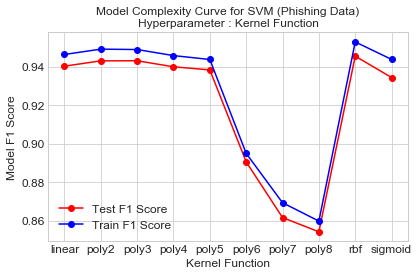

Per Hyperparameter tuning, best parameters are:
{'C': 10.0, 'gamma': 1}


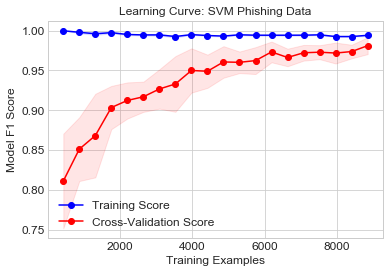

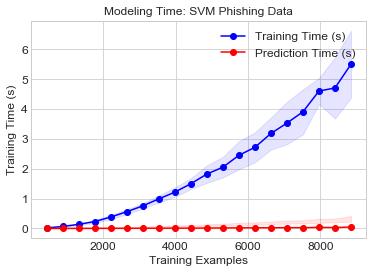

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   5.09533
Model Prediction Time (s): 0.68061

F1 Score:  0.97
Accuracy:  0.97     AUC:       0.96
Precision: 0.96     Recall:    0.98
*****************************************************


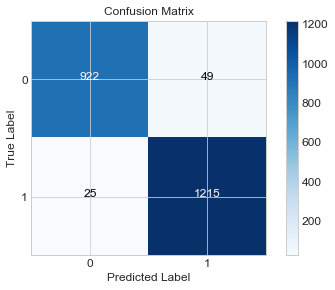

C:\Users\westy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


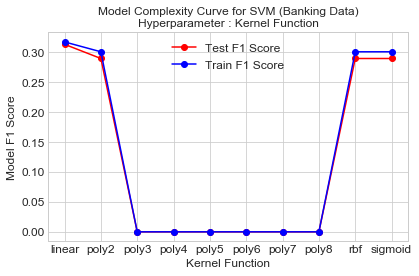

Per Hyperparameter tuning, best parameters are:
{'C': 1, 'gamma': 1}


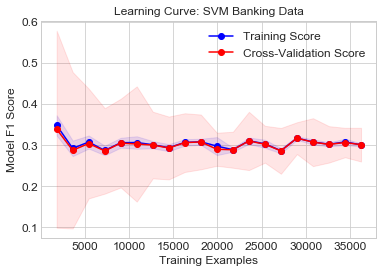

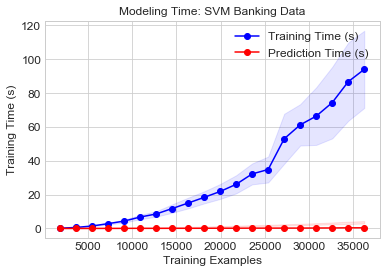

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   107.47378
Model Prediction Time (s): 7.71246

F1 Score:  0.29
Accuracy:  0.90     AUC:       0.59
Precision: 0.65     Recall:    0.19
*****************************************************


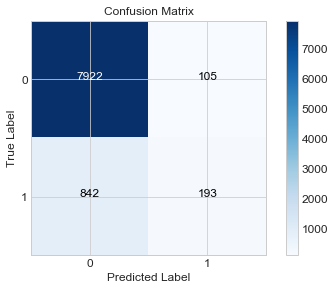

In [23]:
phishX,phishY,bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(phishX),np.array(phishY), test_size=0.20)
hyperSVM(X_train, y_train, X_test, y_test,title="Model Complexity Curve for SVM (Phishing Data)\nHyperparameter : Kernel Function")
C_val, gamma_val = SVMGridSearchCV(X_train, y_train)
estimator_phish = SVC(C=C_val, gamma=gamma_val, kernel='rbf', random_state=100)
train_samp_phish, SVM_train_score_phish, SVM_fit_time_phish, SVM_pred_time_phish = plot_learning_curve(estimator_phish, X_train, y_train,title="SVM Phishing Data")
final_classifier_evaluation(estimator_phish, X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)
hyperSVM(X_train, y_train, X_test, y_test,title="Model Complexity Curve for SVM (Banking Data)\nHyperparameter : Kernel Function")
C_val, gamma_val = SVMGridSearchCV(X_train, y_train)
estimator_bank = SVC(C=C_val, gamma=gamma_val, kernel='rbf', random_state=100)
estimator_bank = SVC(kernel='rbf', random_state=100)
train_samp_bank, SVM_train_score_bank, SVM_fit_time_bank, SVM_pred_time_bank = plot_learning_curve(estimator_bank, X_train, y_train,title="SVM Banking Data")
final_classifier_evaluation(estimator_bank, X_train, X_test, y_train, y_test)

# KNN Classifier

This section will build a classifier using K-nearest neighbors. The hyperparameter will be n_neighbors. One could easily add another hyperparameter is the distance metric, but for simplicity, and for the sake of running the code faster, I won't explore this. I will use the standard euclidean distance for all models. The Model Complexity curve will show F1 score as a function of number of neighbors.

In [24]:
from sklearn.neighbors import KNeighborsClassifier as kNN

def hyperKNN(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    klist = np.linspace(1,250,25).astype('int')
    for i in klist:
        clf = kNN(n_neighbors=i,n_jobs=-1)
        clf.fit(X_train,y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        f1_test.append(f1_score(y_test, y_pred_test))
        f1_train.append(f1_score(y_train, y_pred_train))
        
    plt.plot(klist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(klist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Neighbors')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    

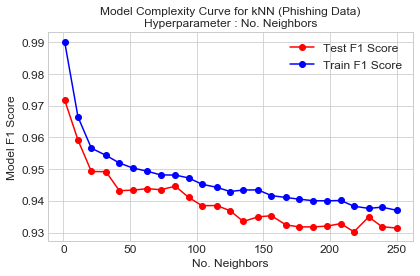

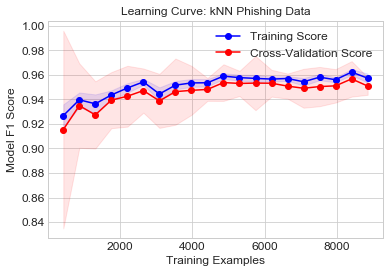

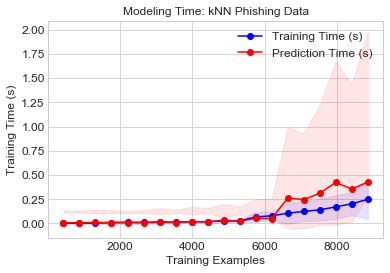

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.06306
Model Prediction Time (s): 0.38154

F1 Score:  0.95
Accuracy:  0.94     AUC:       0.94
Precision: 0.94     Recall:    0.97
*****************************************************


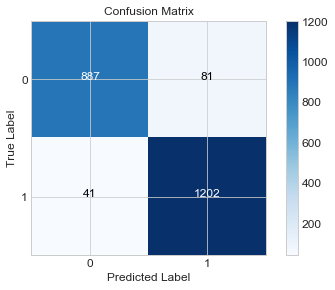

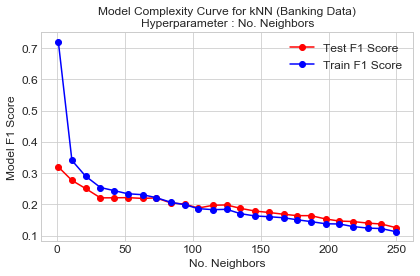

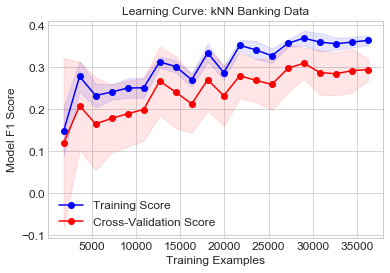

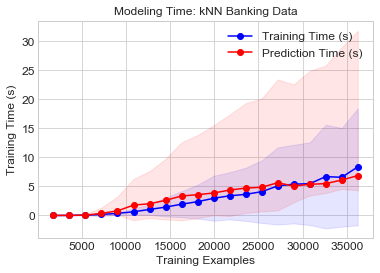

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   1.54257
Model Prediction Time (s): 7.93851

F1 Score:  0.26
Accuracy:  0.90     AUC:       0.57
Precision: 0.65     Recall:    0.16
*****************************************************


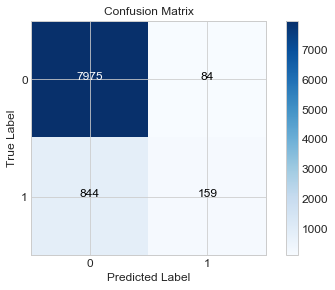

In [15]:
phishX,phishY,bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(phishX),np.array(phishY), test_size=0.20)
hyperKNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for kNN (Phishing Data)\nHyperparameter : No. Neighbors")
estimator_phish = kNN(n_neighbors=20, n_jobs=-1)
train_samp_phish, kNN_train_score_phish, kNN_fit_time_phish, kNN_pred_time_phish = plot_learning_curve(estimator_phish, X_train, y_train,title="kNN Phishing Data")
final_classifier_evaluation(estimator_phish, X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)
hyperKNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for kNN (Banking Data)\nHyperparameter : No. Neighbors")
estimator_bank = kNN(n_neighbors=10, n_jobs=-1)
train_samp_bank, kNN_train_score_bank, kNN_fit_time_bank, kNN_pred_time_bank = plot_learning_curve(estimator_bank, X_train, y_train,title="kNN Banking Data")
final_classifier_evaluation(estimator_bank, X_train, X_test, y_train, y_test)

# Decision Tree Classifier

This section will build a Decision Tree Classifier using information gain (based on entropy) to determine the best feature split per the ID3 algorithm. The model will be pre-pruned by limiting tree depth using the hyperparameter 'max_depth' and by ensuring that each leaf (a terminal node on the tree) has at least 'min_samples_leaf'. 

In [16]:
from sklearn.tree import DecisionTreeClassifier

def hyperTree(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    max_depth = list(range(1,31))
    for i in max_depth:         
            clf = DecisionTreeClassifier(max_depth=i, random_state=100, min_samples_leaf=1, criterion='entropy')
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
      
    plt.plot(max_depth, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(max_depth, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Max Tree Depth')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
     
    
def TreeGridSearchCV(start_leaf_n, end_leaf_n, X_train, y_train):
    #parameters to search:
    #20 values of min_samples leaf from 0.5% sample to 5% of the training data
    #20 values of max_depth from 1, 20
    param_grid = {'min_samples_leaf':np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int'), 'max_depth':np.arange(1,20)}

    tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv=10)
    tree.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(tree.best_params_)
    return tree.best_params_['max_depth'], tree.best_params_['min_samples_leaf']

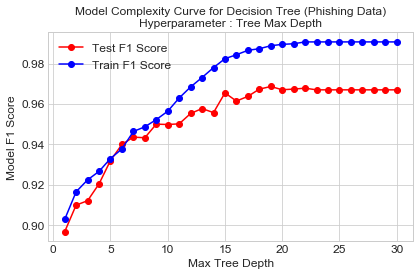

Per Hyperparameter tuning, best parameters are:
{'max_depth': 9, 'min_samples_leaf': 44}


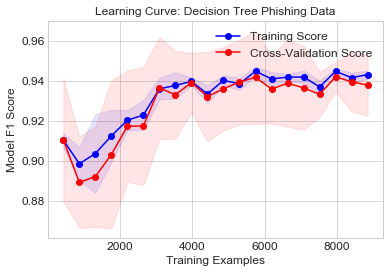

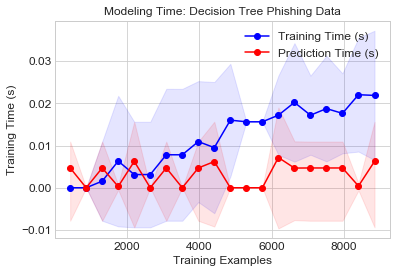

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.01575
Model Prediction Time (s): 0.00064

F1 Score:  0.94
Accuracy:  0.93     AUC:       0.93
Precision: 0.93     Recall:    0.94
*****************************************************


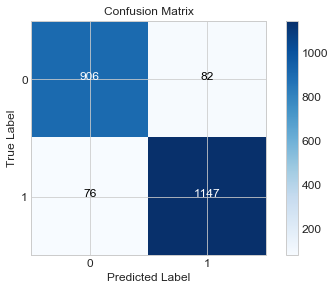

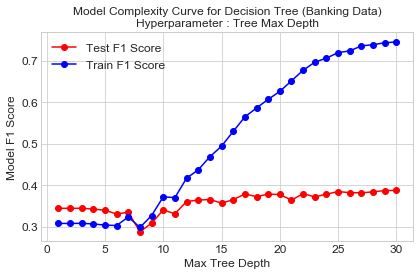

Per Hyperparameter tuning, best parameters are:
{'max_depth': 1, 'min_samples_leaf': 181}


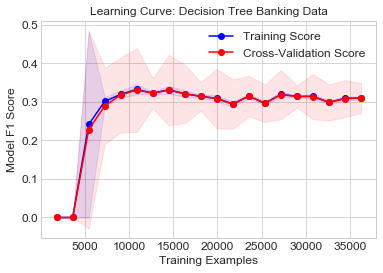

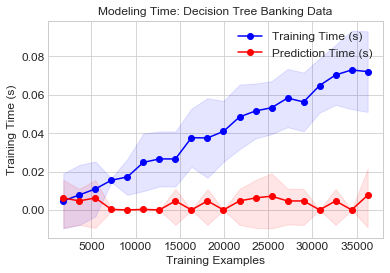

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   0.03383
Model Prediction Time (s): 0.00211

F1 Score:  0.34
Accuracy:  0.90     AUC:       0.61
Precision: 0.66     Recall:    0.23
*****************************************************


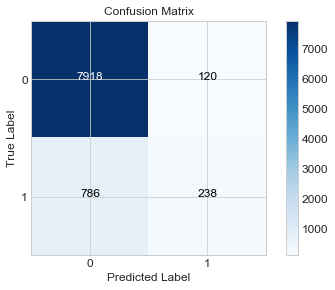

In [17]:
phishX,phishY,bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(phishX),np.array(phishY), test_size=0.20)
hyperTree(X_train, y_train, X_test, y_test,title="Model Complexity Curve for Decision Tree (Phishing Data)\nHyperparameter : Tree Max Depth")
start_leaf_n = round(0.005*len(X_train))
end_leaf_n = round(0.05*len(X_train)) #leaf nodes of size [0.5%, 5% will be tested]
max_depth, min_samples_leaf = TreeGridSearchCV(start_leaf_n,end_leaf_n,X_train,y_train)
estimator_phish = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=100, criterion='entropy')
train_samp_phish, DT_train_score_phish, DT_fit_time_phish, DT_pred_time_phish = plot_learning_curve(estimator_phish, X_train, y_train,title="Decision Tree Phishing Data")
final_classifier_evaluation(estimator_phish, X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)
hyperTree(X_train, y_train, X_test, y_test,title="Model Complexity Curve for Decision Tree (Banking Data)\nHyperparameter : Tree Max Depth")
start_leaf_n = round(0.005*len(X_train))
end_leaf_n = round(0.05*len(X_train)) #leaf nodes of size [0.5%, 5% will be tested]
max_depth, min_samples_leaf = TreeGridSearchCV(start_leaf_n,end_leaf_n,X_train,y_train)
estimator_bank = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=100, criterion='entropy')
train_samp_bank, DT_train_score_bank, DT_fit_time_bank, DT_pred_time_bank = plot_learning_curve(estimator_bank, X_train, y_train,title="Decision Tree Banking Data")
final_classifier_evaluation(estimator_bank, X_train, X_test, y_train, y_test)

# Boosted Decision Tree Classifier

This section will implement a boosted version of the earlier decision tree. We will still keep the pruning based on max_depth and min_samples_leaf, but the cutoff thresholds will be more aggressive (lower) since the power of boosting is to combine multiple weak learners. We also introduce the hyperparameter of n_estimators and learning rate which will determine the contribution of each tree classifier.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

def hyperBoost(X_train, y_train, X_test, y_test, max_depth, min_samples_leaf, title):
    
    f1_test = []
    f1_train = []
    n_estimators = np.linspace(1,250,40).astype('int')
    for i in n_estimators:         
            clf = GradientBoostingClassifier(n_estimators=i, max_depth=int(max_depth/2), 
                                             min_samples_leaf=int(min_samples_leaf/2), random_state=100,)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
      
    plt.plot(n_estimators, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(n_estimators, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Estimators')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def BoostedGridSearchCV(start_leaf_n, end_leaf_n, X_train, y_train):
    #parameters to search:
    #n_estimators, learning_rate, max_depth, min_samples_leaf
    param_grid = {'min_samples_leaf': np.linspace(start_leaf_n,end_leaf_n,3).round().astype('int'),
                  'max_depth': np.arange(1,4),
                  'n_estimators': np.linspace(10,100,3).round().astype('int'),
                  'learning_rate': np.linspace(.001,.1,3)}

    boost = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=param_grid, cv=10)
    boost.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(boost.best_params_)
    return boost.best_params_['max_depth'], boost.best_params_['min_samples_leaf'], boost.best_params_['n_estimators'], boost.best_params_['learning_rate']

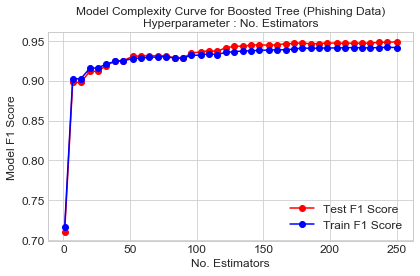

Per Hyperparameter tuning, best parameters are:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 243, 'n_estimators': 100}


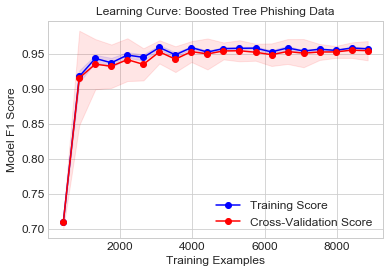

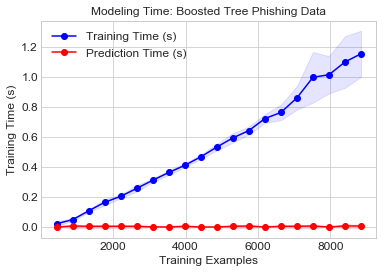

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   1.01331
Model Prediction Time (s): 0.00403

F1 Score:  0.96
Accuracy:  0.96     AUC:       0.96
Precision: 0.96     Recall:    0.97
*****************************************************


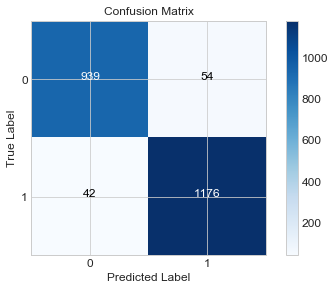

C:\Users\kwest18\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


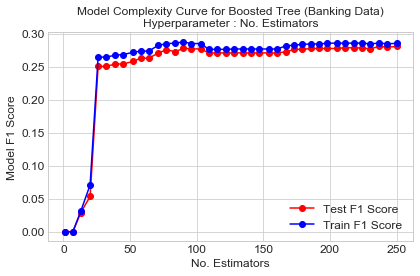

Per Hyperparameter tuning, best parameters are:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 181, 'n_estimators': 100}


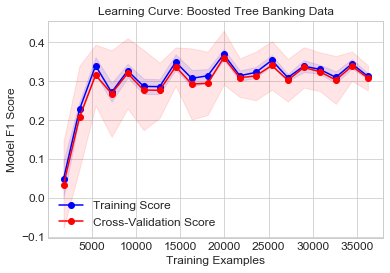

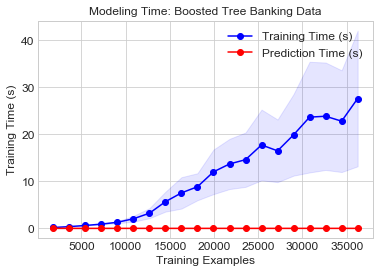

Model Evaluation Metrics Using Untouched Test Dataset
*****************************************************
Model Training Time (s):   7.17347
Model Prediction Time (s): 0.01427

F1 Score:  0.29
Accuracy:  0.89     AUC:       0.59
Precision: 0.66     Recall:    0.19
*****************************************************


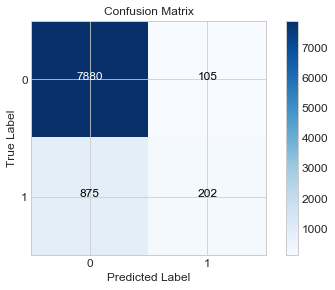

In [19]:
phishX,phishY,bankX,bankY = import_data()

X_train, X_test, y_train, y_test = train_test_split(np.array(phishX),np.array(phishY), test_size=0.20)
hyperBoost(X_train, y_train, X_test, y_test, 3, 50, title="Model Complexity Curve for Boosted Tree (Phishing Data)\nHyperparameter : No. Estimators")
start_leaf_n = round(0.005*len(X_train))
end_leaf_n = round(0.05*len(X_train)) #leaf nodes of size [0.5%, 5% will be tested]
max_depth, min_samples_leaf, n_est, learn_rate = BoostedGridSearchCV(start_leaf_n,end_leaf_n,X_train,y_train)
estimator_phish = GradientBoostingClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                                              n_estimators=n_est, learning_rate=learn_rate, random_state=100)
train_samp_phish, BT_train_score_phish, BT_fit_time_phish, BT_pred_time_phish = plot_learning_curve(estimator_phish, X_train, y_train,title="Boosted Tree Phishing Data")
final_classifier_evaluation(estimator_phish, X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(np.array(bankX),np.array(bankY), test_size=0.20)
hyperBoost(X_train, y_train, X_test, y_test, 3, 50, title="Model Complexity Curve for Boosted Tree (Banking Data)\nHyperparameter : No. Estimators")
start_leaf_n = round(0.005*len(X_train))
end_leaf_n = round(0.05*len(X_train)) #leaf nodes of size [0.5%, 5% will be tested]
max_depth, min_samples_leaf, n_est, learn_rate = BoostedGridSearchCV(start_leaf_n,end_leaf_n,X_train,y_train)
estimator_bank = GradientBoostingClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                                              n_estimators=n_est, learning_rate=learn_rate, random_state=100)
train_samp_bank, BT_train_score_bank, BT_fit_time_bank, BT_pred_time_bank = plot_learning_curve(estimator_bank, X_train, y_train,title="Boosted Tree Banking Data")
final_classifier_evaluation(estimator_bank, X_train, X_test, y_train, y_test)

# 4. Model Comparison Plots

Finally, let's define and call a function that will plot training times and learning rates for the 5 different algorithms so that we can compare across the classifiers for the same dataset.

In [23]:
def compare_fit_time(n,NNtime, SMVtime, kNNtime, DTtime, BTtime, title):
    
    plt.figure()
    plt.title("Model Training Times: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model Training Time (s)")
    plt.plot(n, NNtime, '-', color="b", label="Neural Network")
    plt.plot(n, SMVtime, '-', color="r", label="SVM")
    plt.plot(n, kNNtime, '-', color="g", label="kNN")
    plt.plot(n, DTtime, '-', color="m", label="Decision Tree")
    plt.plot(n, BTtime, '-', color="k", label="Boosted Tree")
    plt.legend(loc="best")
    plt.show()
    
def compare_pred_time(n,NNpred, SMVpred, kNNpred, DTpred, BTpred, title):
    
    plt.figure()
    plt.title("Model Prediction Times: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model Prediction Time (s)")
    plt.plot(n, NNpred, '-', color="b", label="Neural Network")
    plt.plot(n, SMVpred, '-', color="r", label="SVM")
    plt.plot(n, kNNpred, '-', color="g", label="kNN")
    plt.plot(n, DTpred, '-', color="m", label="Decision Tree")
    plt.plot(n, BTpred, '-', color="k", label="Boosted Tree")
    plt.legend(loc="best")
    plt.show()


def compare_learn_time(n,NNlearn, SMVlearn, kNNlearn, DTlearn, BTlearn, title):
    
    plt.figure()
    plt.title("Model Learning Rates: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model F1 Score")
    plt.plot(n, NNlearn, '-', color="b", label="Neural Network")
    plt.plot(n, SMVlearn, '-', color="r", label="SVM")
    plt.plot(n, kNNlearn, '-', color="g", label="kNN")
    plt.plot(n, DTlearn, '-', color="m", label="Decision Tree")
    plt.plot(n, BTlearn, '-', color="k", label="Boosted Tree")
    plt.legend(loc="best")
    plt.show() 

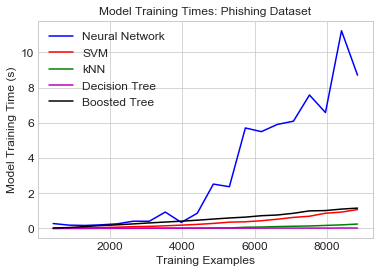

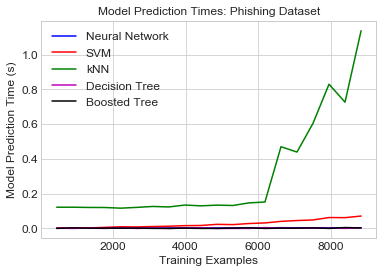

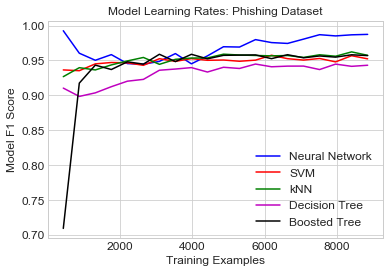

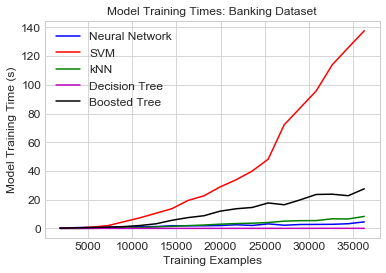

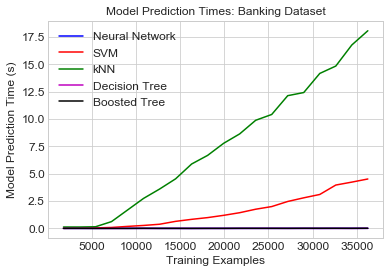

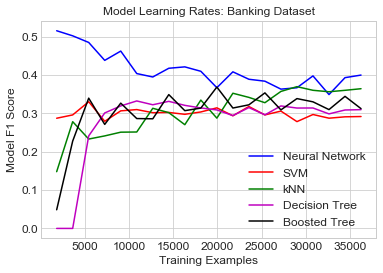

In [24]:
compare_fit_time(train_samp_phish, NN_fit_time_phish, SVM_fit_time_phish, kNN_fit_time_phish, 
                 DT_fit_time_phish, BT_fit_time_phish, 'Phishing Dataset')              
compare_pred_time(train_samp_phish, NN_pred_time_phish, SVM_pred_time_phish, kNN_pred_time_phish, 
                 DT_pred_time_phish, BT_pred_time_phish, 'Phishing Dataset')   
compare_learn_time(train_samp_phish, NN_train_score_phish, SVM_train_score_phish, kNN_train_score_phish, 
                 DT_train_score_phish, BT_train_score_phish, 'Phishing Dataset')  



compare_fit_time(train_samp_bank, NN_fit_time_bank, SVM_fit_time_bank, kNN_fit_time_bank, 
                 DT_fit_time_bank, BT_fit_time_bank, 'Banking Dataset')       
compare_pred_time(train_samp_bank, NN_pred_time_bank, SVM_pred_time_bank, kNN_pred_time_bank, 
                 DT_pred_time_bank, BT_pred_time_bank, 'Banking Dataset')           
compare_learn_time(train_samp_bank, NN_train_score_bank, SVM_train_score_bank, kNN_train_score_bank, 
                 DT_train_score_bank, BT_train_score_bank, 'Banking Dataset')